# Preparazione dell'ambiente di sviluppo 
- importiamo le librerie necessarie all'analisi

- se necessario vi manderemo un link per rieseguire da casa il notebook su cui lavorerete oggi, via browser, senza dover installare nulla (ci stiamo lavorando)
https://mybinder.org/v2/gh/davidpelosi21/ICD2025.git/HEAD

In [1]:
# lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import Image
from sunpy.net import Fido
from sunpy.net import attrs as a

## Le basi di Neutron Monitor (NM)
- questa mappa mostra il network globale di basi di Neutron Monitor disponibili 

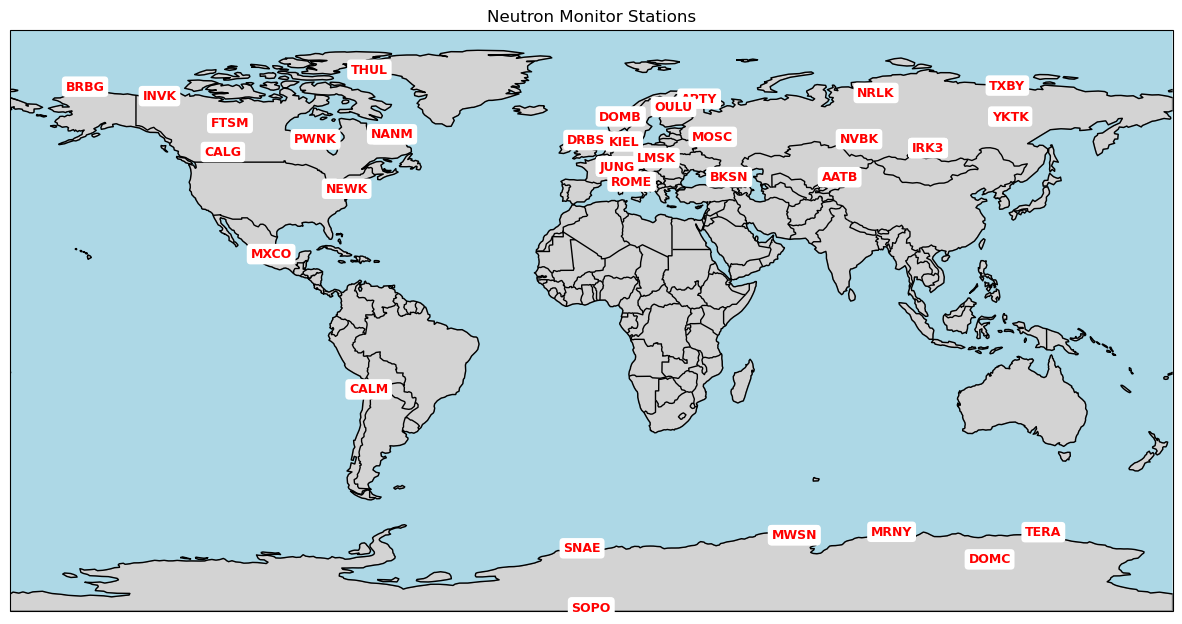

In [2]:
Image(filename='figures/stations.png', width=800, height=800)

Se non trovate qualche base di NM nella tabella sotto (può capitare) - cercate le informazioni qui:
[Link to Neutron Monitor Database](https://www.nmdb.eu/station/)

# Questa tabella mostra le proprietà principali di ciascun NM, in partcolare:
- coordinate geografiche
- altitudine (un parametro importante per identificare un GLE)
- il cutoff geomagnetico (espresso in GigaVolt) 

In [3]:
csv_file_path = 'neutron_monitor_stations.csv'
df = pd.read_csv(csv_file_path)
df

,Station Code,Location,Altitude (m),Cutoff Rigidity (GV),Latitude (°),Longitude (°)
0,AATB,"Alma-Ata, Kazakhstan",3340,5.9,43.25,76.92
1,APTY,"Apatity, Russia",177,0.65,67.57,33.40
2,BKSN,"Baksan Valley, Russia",1700,5.6,43.28,42.70
3,BRBG,"Barrow, Alaska, USA",8,0.17,71.29,-156.76
4,CALG,"Calgary, Canada",1128,1.08,51.05,-114.07
5,CALM,"Calama, Chile",2265,12.8,-22.46,-68.93
6,DOMB,"Dome B, Antarctica",3233,0.01,-70.10,123.35
7,DOMC,"Dome C, Antarctica",3233,0.01,-75.10,123.35
8,DRBS,"Durham, UK",50,2.3,54.77,-1.58
9,FTSM,"Fort Smith, Canada",203,0.3,60.02,-111.88


## Esercizio: Osservazione di un GLE 

Abbiamo visto come i neutron monitor siano in grado di osservare (indirettamente) un evento solare intenso (flare). L'effetto si manifesta come un rapido aumento dei conteggi.

Questo effetto viene chiamato **Ground Level Enhancement 'GLE'** 

# Ognuno di voi potrà scegliere un evento tra i seguenti:
- event 70
- event 71
- event 72
- event 73
- event 74 (esempio)
- event 75
- event 76

## Verificare se nel periodo analizzato si è verificato un evento solare intenso, osservando i conteggi di diverse basi di Neutron Monitor (in realtà la loro variazione rispetto alla meda del periodo precendente)


- Un evento GLE viene registrato quando ci sono aumenti coincidenti nel tempo e statisticamente significativi dei tassi di conteggio di **almeno due monitori di neutroni situati in posizioni differenti**, tra cui almeno un monitor di neutroni vicino al **livello del mare** (Ground-level) e un corrispondente aumento nel **flusso di protoni misurato da un esperimento spaziale** (Poluianov et al., 2017).

# Sub-GLE
osservare un aumento significativo dei conteggi in una base di NM è necessaario ma non sufficiente per affermare di aver osservato un GLE. Esistono anche i sub-GLE, ossia fenomeni meno intensi che non raggiungono i NM posti a basse altitudini, inoltre improvvisi malfunzionamenti dell'hardware di un NM potrebbero dare un falso segnale

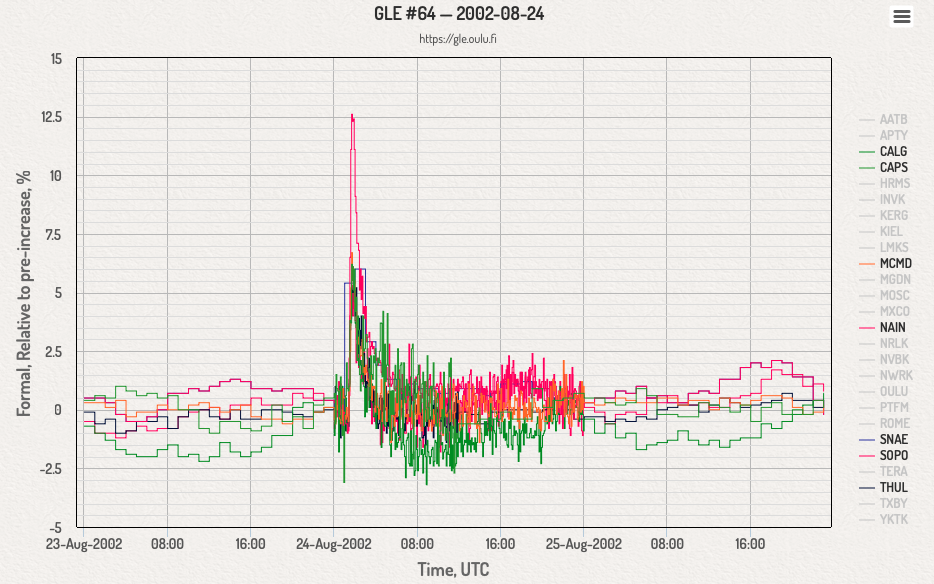

In [4]:
Image(filename='figures/GLE_ex.png', width=800, height=800)
# hourly data

# Scegli il tuo evento

In [32]:
event = '75'
# e.g. '74'

## Seleziona i dati di Neutron Monitor da visualizzare

In [48]:
base1 = 'nain' 
# per aggiungere piu basi da visualizzare (uncomment)
base2 = 'txby'
base3 = 'domc'
base4 = 'sopb'

In [49]:
nm1 = f'event_{event}/c0{event}{base1}.dat'

# per aggiungere piu basi da visualizzare (uncomment)
nm2 = f'event_{event}/c0{event}{base2}.dat'
nm3 = f'event_{event}/c0{event}{base3}.dat'
nm4 = f'event_{event}/c0{event}{base4}.dat'
#nm3 = f'event_74/c074{base3}.dat'
#nm4 = f'event_74/c074{base4}.dat'

In [51]:
data_nm1 = pd.read_csv(nm1, skiprows=9, header=None,sep='\s+', on_bad_lines='skip')
ind1 = data_nm1[data_nm1.apply(lambda row: row.astype(str).str.contains('\*').any(), axis=1)].index
data_nm1 = data_nm1.iloc[:ind1[0]]
data_nm1 = data_nm1.replace(-999.00, np.nan)
data_nm1 = data_nm1.dropna()
data_nm1 = data_nm1.drop(data_nm1[data_nm1[8] == '-9999'].index)



data_nm1['DateTime'] = pd.to_datetime(data_nm1[1].astype(str) + ' ' + data_nm1[3].str[:6], format='%y%m%d %H%M%S')
data_nm1['Value'] = data_nm1[8].astype(float)


# per aggiungere piu basi da visualizzare (uncomment)

data_nm2 = pd.read_csv(nm2, skiprows=9, header=None,sep='\s+', on_bad_lines='skip')
ind2 = data_nm2[data_nm2.apply(lambda row: row.astype(str).str.contains('\*').any(), axis=1)].index
data_nm2 = data_nm2.iloc[:ind2[0]]
data_nm2 = data_nm2.replace(-999.00, np.nan)

data_nm2 = data_nm2.dropna()
data_nm2 = data_nm2.drop(data_nm2[data_nm2[8] == '-9999'].index)
data_nm2['DateTime'] = pd.to_datetime(data_nm2[1].astype(str) + ' ' + data_nm2[3].str[:6], format='%y%m%d %H%M%S')
data_nm2['Value'] = data_nm2[8].astype(float)


data_nm3 = pd.read_csv(nm3, skiprows=9, header=None,sep='\s+', on_bad_lines='skip')
ind3 = data_nm3[data_nm3.apply(lambda row: row.astype(str).str.contains('\*').any(), axis=1)].index
data_nm3 = data_nm3.iloc[:ind3[0]]
data_nm3 = data_nm3.replace(-999.00, np.nan)

data_nm3 = data_nm3.dropna()
data_nm3 = data_nm3.drop(data_nm3[data_nm3[8] == '-9999'].index)
data_nm3['DateTime'] = pd.to_datetime(data_nm3[1].astype(str) + ' ' + data_nm3[3].str[:6], format='%y%m%d %H%M%S')
data_nm3['Value'] = data_nm3[8].astype(float)


data_nm4 = pd.read_csv(nm4, skiprows=9, header=None,sep='\s+', on_bad_lines='skip')
ind4 = data_nm4[data_nm4.apply(lambda row: row.astype(str).str.contains('\*').any(), axis=1)].index
data_nm4 = data_nm4.iloc[:ind2[0]]
data_nm4 = data_nm4.replace(-999.00, np.nan)

data_nm4 = data_nm4.dropna()
data_nm4 = data_nm4.drop(data_nm4[data_nm4[8] == '-9999'].index)
data_nm4['DateTime'] = pd.to_datetime(data_nm4[1].astype(str) + ' ' + data_nm4[3].str[:6], format='%y%m%d %H%M%S')
data_nm4['Value'] = data_nm4[8].astype(float)


# Abbiamo caricato i dati, siamo pronti per visualizzare

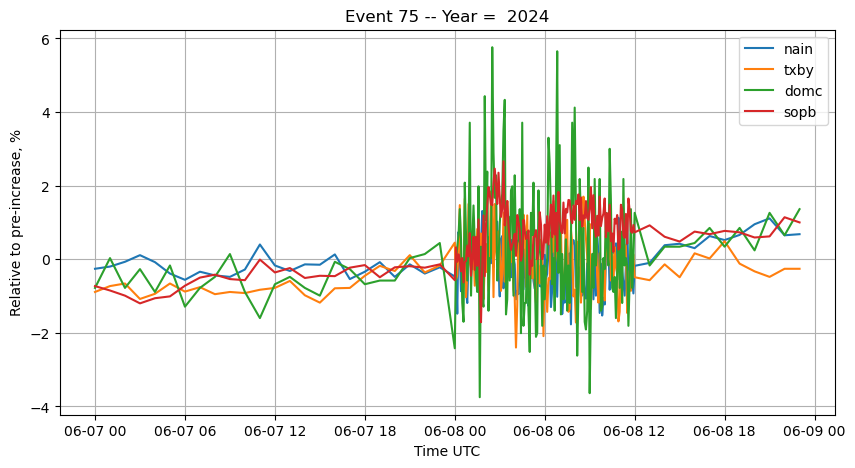

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(data_nm1['DateTime'], data_nm1['Value'], label=f'{base1}')
plt.plot(data_nm2['DateTime'], data_nm2['Value'], label=f'{base2}')
plt.plot(data_nm3['DateTime'], data_nm3['Value'], label=f'{base3}')
plt.plot(data_nm4['DateTime'], data_nm4['Value'], label=f'{base4}')
plt.xlabel('Time UTC')
plt.ylabel('Relative to pre-increase, %')
# title the year of the event
plt.title(f'Event {event} -- Year =  {data_nm1["DateTime"][0].year}')
plt.legend()
plt.grid(True)
plt.show()

# Se nel perido osservato si identifica un GLE (secondo la definizione)
- stima la data di arrivo sulla Terra dell'evento solare:
- verifica se nella stessa data un esperimento spaziale ha misurato un aumento del flusso di protoni (solar flare)

In [53]:
data_evento = '2024-06-08'
# e.g. 'year-month-day'

## Osservazione del flusso di protoni dallo spazio 

oltre alle osservazioni a terra è necessario verificare se un esperimento spaziale ha osservato (nello stesso periodo) un aumento del flusso di protoni

## Dati da Satellite
Per verificare il corrispondente aumento nel flusso di protoni misurato da un esperimento spaziale, usiamo i dati di **GOES** (Geostationary Operational Environmental Satellite)

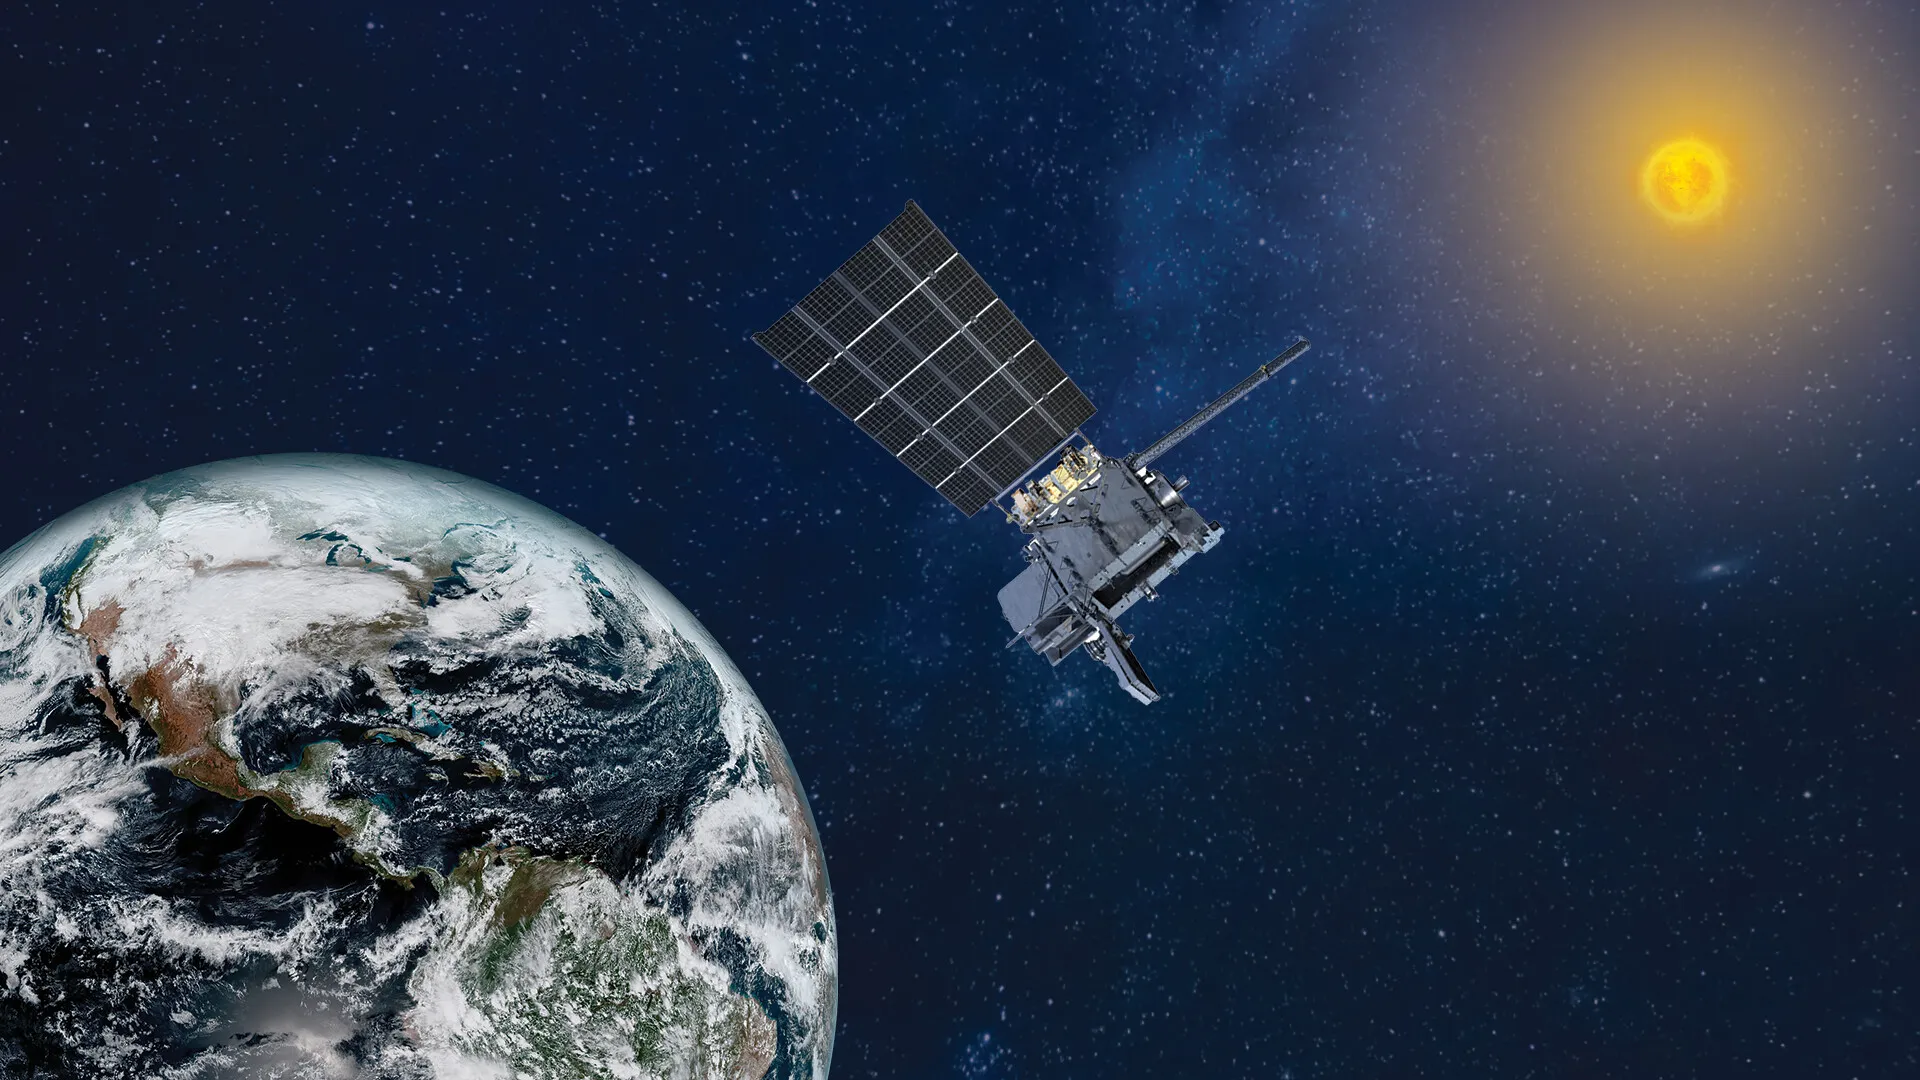

In [54]:
Image(filename='figures/goes.png', width=800, height=800)

# Cosa vede GOES?

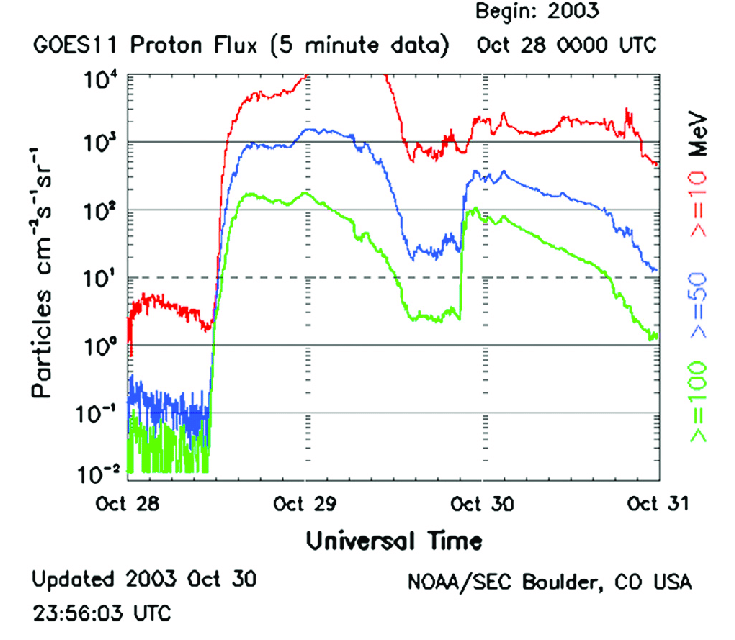

In [55]:
Image(filename='figures/GOES_proton.png', width=800, height=800)

# Osservazione nell'ottico
Quando GOES osserva un aumento del flusso di protoni, associato ad un solar flare, classifica l'evento in base all'intensità misurata nella banda ottica

## Classificazione dei solar flare in base alla loro intensità
| Solar Flare Class | Intensity $W/m^2$  |
|-------------------|------------------------------|
| B                 | $I < 10^{-6} $            |
| C                 | $ 10^{-6} < I < 10^{-5} $  |
| M                 | $ 10^{-5} < I < 10^{-4} $  |
| X                 | $ I > 10^{-4} $            |

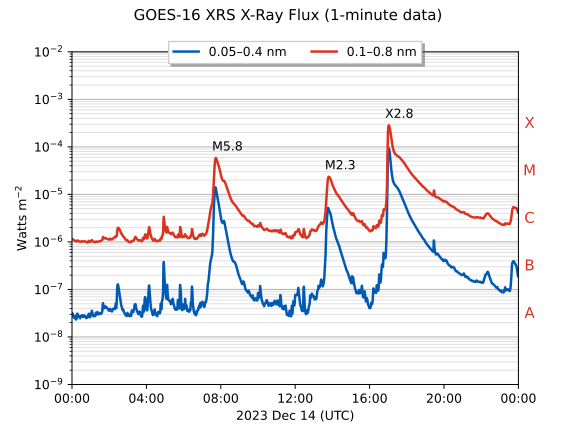

In [56]:
Image(filename='figures/GOES_photon.png', width=800, height=800)

## Verifica se nel giorno selezionato è stato osservato un flare solare da GOES

In [57]:
tstart = data_evento + ' 00:00:00'
tend = data_evento + ' 11:59:59'

In [58]:
event_type = "FL"
result = Fido.search(a.Time(tstart, tend),
                     a.hek.EventType(event_type),
                     a.hek.FL.GOESCls > "M1.0",
                     a.hek.OBS.Observatory == "GOES")



# It"s also possible to access the HEK results from the
# `~sunpy.net.fido_factory.UnifiedResponse` by name.
hek_results = result["hek"]

filtered_results = hek_results["event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum"]

by_magnitude = sorted(filtered_results, key=lambda x: ord(x['fl_goescls'][0]) + float(x['fl_goescls'][1:]), reverse=True)

for flare in by_magnitude:
    print(f"Class {flare['fl_goescls']} occurred on {flare['event_starttime']}")

Class M9.7 occurred on 2024-06-08 01:23:00.000
Class M3.3 occurred on 2024-06-08 00:39:00.000
Class M1.8 occurred on 2024-06-08 00:18:00.000
Class M1.5 occurred on 2024-06-08 05:17:00.000
Class M1.2 occurred on 2024-06-08 08:34:00.000
Class M1.2 occurred on 2024-06-08 08:54:00.000


# Domande
- nel periodo selezionato è avvento un GLE? 
- quali basi di NM avete usato per identificare il GLE?
- quale (o quali) solar flare (classe di intensità) è associato al GLE?

    Si, nel periodo selezionato è avvenuto un GLE. Le basi da noi scelte per verificare il GLE sono NAIN, a bassa quota; TXBY, a bassa quota; DOMC, ad alta quota; SOPB, ad alta quota. La classe di intensità è M, in particolare M9.7.
    
    Greta Vitali